<a href="https://colab.research.google.com/github/hafsa-44/assignment_repodum/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION ON EMPLOYEE SALARY PREDICTION

In [ ]:
####STEP 1 Importing panda necessaty library
import pandas  as pd
df = pd.read_csv('/content/Salary Data.csv')
df.head() ## Print first Five features /columns of dataset


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
##Check Null Values in dataset
null_counts = df.isnull().sum()
print(null_counts)

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


 Checking Categoral variables and NUmerical varibales

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   375 non-null    float64
 1   Gender                375 non-null    int64  
 2   Education Level       375 non-null    int64  
 3   Job Title             375 non-null    int64  
 4   Years of Experience   375 non-null    float64
 5   Salary                375 non-null    float64
 6   Job Title             375 non-null    object 
 7   Gender                375 non-null    int64  
 8   Years of Experience   375 non-null    float64
 9    Salary               375 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 29.4+ KB


In [ ]:
categorial = [var for var in df.columns if
              df[var].dtype == 'O'
              ]
categorial

['Gender', 'Education Level', 'Job Title']

In [ ]:
numerical = [num for num in df.columns if df[num].dtype != 'O']
numerical

['Age', 'Years of Experience', 'Salary']

In [ ]:
### Length of total categorial and numerical variables or features
length = len(categorial)
print("Length of categorial variables is :" ,length )
length = len(numerical)
print("Length of  numerical variables is :" ,length )

Length of categorial variables is : 3
Length of categorial variables is : 3


In [161]:
# Print all column names with their respective indices
df.columns = df.columns.str.strip()

# Remove duplicate columns while keeping the first occurrence
df = df.loc[:, ~df.columns.duplicated()]
for idx, col in enumerate(df.columns):
    print(f"Index {idx}: '{col}'")




Index 0: 'Age'
Index 1: 'Gender'
Index 2: 'Education Level'
Index 3: 'Job Title'
Index 4: 'Years of Experience'
Index 5: 'Salary'


In [162]:
df['Age'] = df['Age'].fillna(method='bfill')
#df['Years of Experience '] = df['Years of Experience'].fillna(0)
df['Years of Experience'] = df['Years of Experience'].fillna(method='bfill')
df['Salary'] = df['Salary'].fillna(method='bfill')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


<ipython-input-162-a0b4f1cab2fe>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='bfill')
<ipython-input-162-a0b4f1cab2fe>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Years of Experience'] = df['Years of Experience'].fillna(method='bfill')
<ipython-input-162-a0b4f1cab2fe>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Salary'] = df['Salary'].fillna(method='bfill')


In [163]:
##Check Null Values in dataset
null_counts = df.isnull().sum()
print(null_counts)

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
cat_frame = pd.DataFrame(categorial)
cat_frame

,0
0,Gender
1,Education Level
2,Job Title


Train Test Split on our Dataset


In [165]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Job Title' column if it exists
if 'Job Title' in df.columns:
    df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

# Convert 'Gender' column if it exists
if 'Gender' in df.columns:
    df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Convert 'Education Level' column if it exists
if 'Education Level' in df.columns:
    df['Education Level'] = label_encoder.fit_transform(df['Education Level'])

# Check the dataset info after conversion
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


In [166]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [179]:
df.head()
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Step 5: Define the target and feature variables
#X = df.iloc[:,[0,1,2,3,4]]# Features (all columns except 'salary'
X = df[['Years of Experience']]
X
# Target (the salary column)\
#X= np.array(X)
#y = np.array(y).ravel()

,Years of Experience
0,5.0
1,3.0
2,15.0
3,7.0
4,20.0
...,...
370,8.0
371,19.0
372,2.0
373,7.0


In [180]:
X
target = 'Salary'
y = df['Salary']
# Step 7: Initialize and train the Linear Regression model
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [183]:
# Step 8: Make predictions using the testing set
y_pred = model.predict(X_test)
y_pred
y_test




,Salary
167,150000.0
33,65000.0
15,125000.0
316,80000.0
57,140000.0
...,...
94,75000.0
196,90000.0
350,160000.0
312,150000.0


In [184]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# Optional: Check model coefficients (feature importance)
print("Model Coefficients:", model.coef_)

Root Mean Squared Error: 19772.460467743924
Model Coefficients: [6829.03736415]


<ipython-input-185-2ec464f7eeeb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: xlabel='Salary', ylabel='Density'>

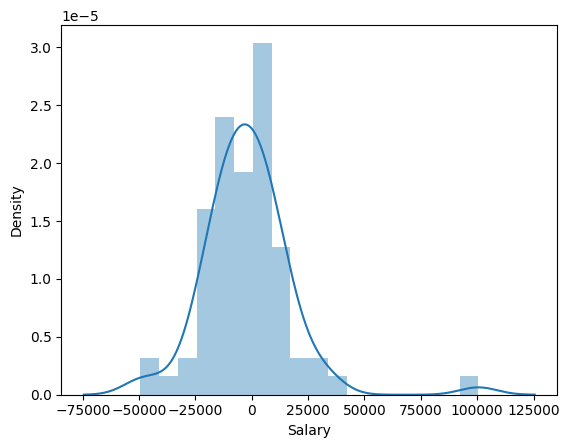

In [185]:
import seaborn as sns
sns.distplot(y_pred-y_test)

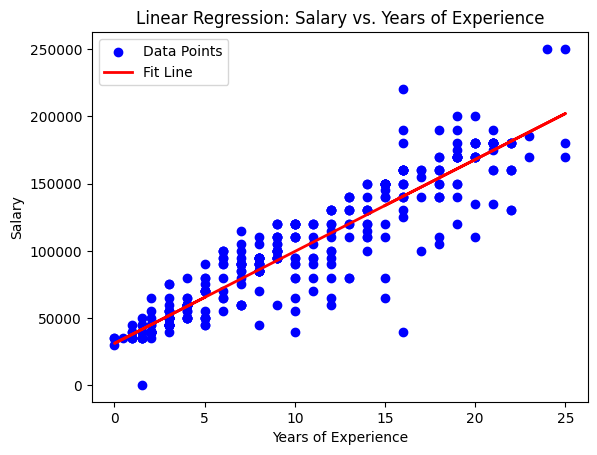

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the fit line
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Fit Line')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.legend()

# Show the plot
plt.show()
